In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dir_list = os.listdir("./../out/corrected/counts")
print("Directories we will be working with: ", dir_list)

data = {}
print("Total number of files: ", len(dir_list))
rounds = {}

for dir in dir_list:
    if not re.findall("aav2.*", dir):
        temp = re.findall(".*np-cc_aa-seq-counts.*", dir)
        if temp:
            if "norm" in data:
                data["norm"].append(temp[0])
            else:
                data["norm"] = [temp[0]]
            continue
        
        temp = re.findall(".*np-cc_gel-extract_aa-seq-counts.*", dir)
        if temp:
            if "gel" in data:
                data["gel"].append(temp[0])
            else:
                data["gel"] = [temp[0]]
            continue

        temp = re.findall(".*np-cc_repeat_aa-seq-counts.*", dir)
        if temp:
            if "repeat" in data:
                data["repeat"].append(temp[0])
            else:
                data["repeat"] = [temp[0]]
            continue
        #############################
        temp = re.findall("r0_np-cc_repeat_aa-seq-counts.*", dir)
        if temp:
            if "r0" in data:
                data["r0"].append(temp[0])
            else:
                data["r0"] = [temp[0]]
            continue

        temp = re.findall("r0_np-cc_gel-extract_aa-seq-counts.*", dir)
        if temp:
            if "r0" in data:
                data["r0"].append(temp[0])
            else:
                data["r0"] = [temp[0]]
            continue

        temp = re.findall("r0_np-cc_aa-seq-counts.*", dir)
        if temp:
            if "r0" in data:
                data["r0"].append(temp[0])
            else:
                data["r0"] = [temp[0]]
            continue

print("Number of \"matches\": ", len(data))

sum = 0
for d in data:
    sum += len(data[d])

print("Number of files we will be working on: ", sum)
print(data)


Directories we will be working with:  ['r0_pb_aa-seq-translated.tsv.gz', 'aav2-np_nt-seq-counts.tsv.gz', 'r5_np_aa-seq-translated.tsv.gz', 'r0_pb_aa-seq-counts.tsv.gz', 'r0_np-cc_repeat_nt-seq-counts.tsv.gz', 'aav2_np-cc_aa-seq-counts.tsv.gz', 'aav2_np-cc_nt-seq-counts.tsv.gz', 'aav2_np-cc_aa-seq-translated.tsv.gz', 'r5_np_aa-seq-counts.tsv.gz', 'r0_pb_nt-seq-counts.tsv.gz', 'r5_np-cc_aa-seq-counts.tsv.gz', 'r1_np-cc_gel-extract_aa-seq-counts.tsv.gz', 'r0_np-cc_repeat_aa-seq-counts.tsv.gz', 'r0_np-cc_gel-extract_aa-seq-counts.tsv.gz', 'r0_np-cc_repeat_aa-seq-translated.tsv.gz', 'r0_np_nt-seq-counts.tsv.gz', 'r5_np-cc_aa-seq-translated.tsv.gz', 'r0_np-cc_gel-extract_nt-seq-counts.tsv.gz', 'r1_np-cc_gel-extract_nt-seq-counts.tsv.gz', 'r0_np_aa-seq-counts.tsv.gz', 'r1_np-cc_aa-seq-counts.tsv.gz', 'r0_np-cc_aa-seq-counts.tsv.gz', 'r5_sanger_aa-seq-translated.tsv.gz', 'r1_np-cc_nt-seq-counts.tsv.gz', 'r5_sanger_nt-seq-counts.tsv.gz', 'r5_np_nt-seq-counts.tsv.gz', 'r0_np-cc_nt-seq-counts.tsv

In [125]:
# In this version I match all of the r0 read to all of the r1 and r5 reads 
# (i.e. I don't section them by file name)

# TODO: should I drop duplicates? YES (this is your answer not Suzanne's)


rounds = {'r0': ['r0_np-cc_repeat_aa-seq-counts.tsv.gz', 'r0_np-cc_aa-seq-counts.tsv.gz', 'r0_np-cc_gel-extract_aa-seq-counts.tsv.gz'], 'r1': ['r1_np-cc_gel-extract_aa-seq-counts.tsv.gz', 'r1_np-cc_aa-seq-counts.tsv.gz', ], 'r5': ['r5_np-cc_aa-seq-counts.tsv.gz']}

# Empty data frames to hold the sequenced reads of each round
r0 = pd.DataFrame()
r1 = pd.DataFrame()
r5 = pd.DataFrame()

# Combine all of the reads of all of the rounds into the empy data frames above
for r in rounds:
    if r == 'r0':
        for file in rounds[r]:
            print("this ir r0: ", file)
            if len(r0) == 0:
                r0 = pd.read_csv("./../out/corrected/counts/" + file, sep='\t').rename(columns={'count':'r0'})
            else:
                # TODO: I am assuming that the files contain the same number of counts for each sequence and I am just checking if there are new/differnet amino acid (aa) sequences between each file
                temp = pd.read_csv("./../out/corrected/counts/" + file, sep='\t').rename(columns={'count':'r0'})
                r0 = pd.concat([temp, r0]).drop_duplicates(subset=['sequence'])
                # r0 = pd.concat([temp, r0])
    elif r == 'r1':
        for file in rounds[r]:
            print("this ir r1: ", file)
            if len(r1) == 0:
                r1 = pd.read_csv("./../out/corrected/counts/" + file, sep='\t').rename(columns={'count':'r1'})
            else:
                # TODO: I am assuming that the files contain the same number of counts for each sequence and I am just checking if there are new/differnet amino acid (aa) sequences between each file
                temp = pd.read_csv("./../out/corrected/counts/" + file, sep='\t').rename(columns={'count':'r1'})
                r1 = pd.concat([temp, r1]).drop_duplicates(subset=['sequence'])
                # r1 = pd.concat([temp, r1])
        
    elif r == 'r5':
        for file in rounds[r]:
            print("this ir r5: ", file)
            if len(r5) == 0:
                r5 = pd.read_csv("./../out/corrected/counts/" + file, sep='\t').rename(columns={'count':'r5'})
            else:
                # TODO: I am assuming that the files contain the same number of counts for each sequence and I am just checking if there are new/differnet amino acid (aa) sequences between each file
                temp = pd.read_csv("./../out/corrected/counts/" + file, sep='\t').rename(columns={'count':'r5'})
                r5 = pd.concat([temp, r5]).drop_duplicates(subset=['sequence'])
                # r5 = pd.concat([temp, r5])

this ir r0:  r0_np-cc_repeat_aa-seq-counts.tsv.gz
this ir r0:  r0_np-cc_aa-seq-counts.tsv.gz
this ir r0:  r0_np-cc_gel-extract_aa-seq-counts.tsv.gz
this ir r1:  r1_np-cc_gel-extract_aa-seq-counts.tsv.gz
this ir r1:  r1_np-cc_aa-seq-counts.tsv.gz
this ir r5:  r5_np-cc_aa-seq-counts.tsv.gz


In [126]:
r0_sum = r0['r0'].sum()
r1_sum = r1['r1'].sum()
r5_sum = r5['r5'].sum()

# print(r0)

# r0['r0'] = r0['r0'] / r0_sum
# r1['r1'] = r1['r1'] / r1_sum
# r5['r5'] = r5['r5'] / r5_sum

r0['r0'] = (np.log(r0['r0']) + 1) / r0_sum
r1['r1'] = (np.log(r1['r1']) + 1) / r1_sum
r5['r5'] = (np.log(r5['r5']) + 1) / r5_sum

# r0['r0'] = np.log((r0['r0'] / r0_sum) + 1)
# r1['r1'] = np.log((r1['r1'] / r1_sum) + 1)
# r5['r5'] = np.log((r5['r5'] / r5_sum) + 1)




In [129]:
print(r0_sum)
# print("r0: ", r0)
# print("r1: ", r1)
print("r5: ", r5)

912373
r5:               r5                                           sequence
0      0.000039  MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...
1      0.000035  MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...
2      0.000034  MAADGYLPDWLEDNLSEGIREWWALKPGVPQPKANQQHQDNRRGLV...
3      0.000032  MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...
4      0.000032  MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...
...         ...                                                ...
16825  0.000003  MAADGYLPDWLEDTLSEGISEWWKLKPGPPTPKPAEQHQDNRRGLV...
16826  0.000003  MAADGYLPDWLEDTLSEGISQWWKLKPGPPPPKPAERHKDDSRGLV...
16827  0.000003  MAADGYLPDWLEDTLSEGISQWWKLKPGPPPPKPAERHKDDSRGLV...
16828  0.000003  MAADGYLPDWLEDTLTEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...
16829  0.000003  MAADGYLPDWLEDTLTEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...

[16830 rows x 2 columns]


In [127]:
# Merge them into a DataFrame
merged_0_1 = pd.merge(r0, r1, on='sequence')
merged_0_5 = pd.merge(r0, r5, on='sequence')

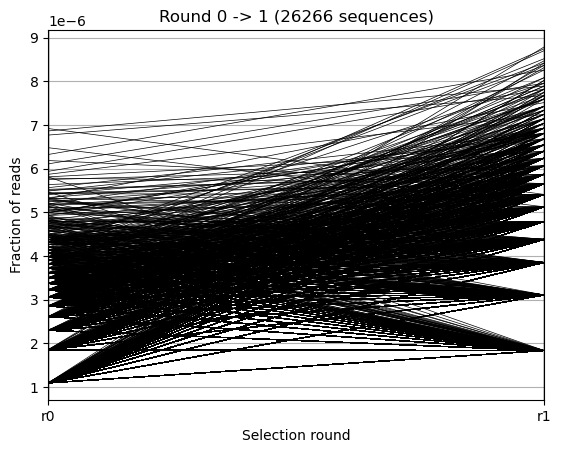

In [128]:
# Make ro -> r1 plot replacation_of_ro_to_r1_plot-v2.png

graph = pd.plotting.parallel_coordinates(merged_0_1, "sequence", color='black', linewidth=0.5)


plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.title(f"Round 0 -> 1 ({len(merged_0_1)} sequences)")
graph.legend_ = None
plt.ylabel("Fraction of reads")
plt.xlabel("Selection round")


plt.savefig('./replacation_of_ro_to_r1_plot-v2.png')

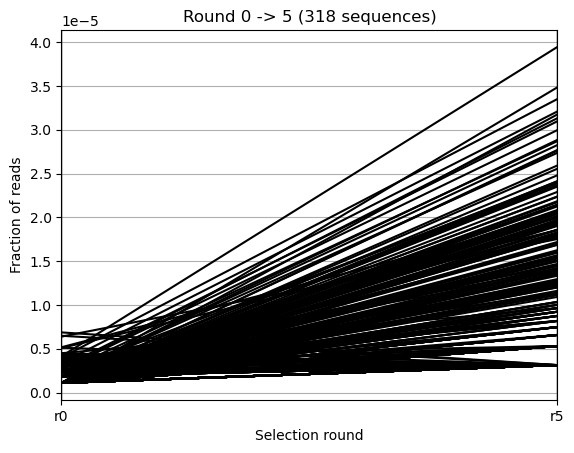

In [130]:
# Make r0 -> r5 plot and save it into replacation_of_ro_to_r5_plot-v2.png

graph = pd.plotting.parallel_coordinates(merged_0_5, "sequence", color='black')

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.title(f"Round 0 -> 5 ({len(merged_0_5)} sequences)")
graph.legend_ = None
plt.ylabel("Fraction of reads")
plt.xlabel("Selection round")


plt.savefig('./replacation_of_ro_to_r5_plot-v2.png')

In [138]:
r0['round'] = 'r0'
r1['round'] = 'r1'
r5['round'] = 'r5'


r0.rename(columns={'r0' : 'Fraction of reads'}, inplace=True)
r1.rename(columns={'r1' : 'Fraction of reads'}, inplace=True)
r5.rename(columns={'r5' : 'Fraction of reads'}, inplace=True)

test = pd.concat([r0, r1, r5])

In [139]:
# print(len(test))
# print(test)
print(r0)

       Fraction of reads                                           sequence  \
0               0.000007  MAADGYLPDWLEDNLSEGIREWWALKPGAPQPKANQQKQDDGRGLV...   
1               0.000007  MAADGYLPDWLEDTLSEGIREWWALKPGAPKPKANQQKQDDGRGLV...   
2               0.000007  MAADGYLPDWLEDTLSEGIRQWWKLKPGAPKPKANQQKQDDGRGLV...   
3               0.000006  MAADGYLPDWLEDNLSEGIREWWALKPGAPKPKANQQKQDDGRGLV...   
4               0.000006  MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...   
...                  ...                                                ...   
85491           0.000001  MAADGYLPDWLEDTLSEGIRQWWKLKPGVPQPKANQQHQDNRRGLV...   
85492           0.000001  MAADGYLPDWLEDTLSEGIRQWWKLKPGVPQPKANQQHQDNRRGLV...   
85493           0.000001  MAADGYLPDWLEDTLSEGIRQWWKLKPGVPQPKANQQKQDDGRGLV...   
85494           0.000001  MAADGYLPDWLEDTLSEGIRQWWKLKPGVPQPKANQQKQDDGRGLV...   
85495           0.000001  MAADGYLPDWLEDTLSEGIRQWWKLKPGVPQPKANQQKQDDGRGLV...   

      round  
0        r0  
1        r0  
2        

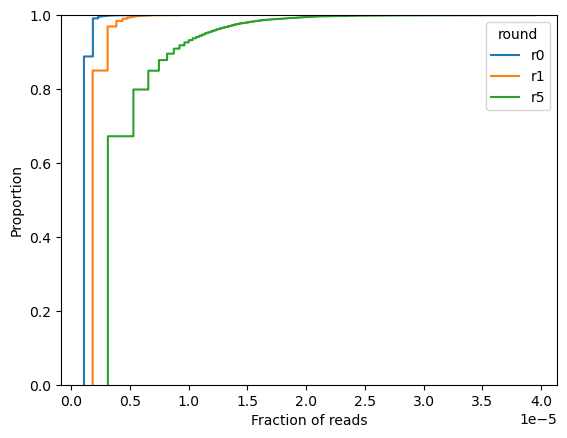

In [141]:
sns.ecdfplot(data=test, x="Fraction of reads", hue="round")

# penguins = sns.load_dataset("penguins")
# sns.ecdfplot(data=penguins, x="flipper_length_mm")
# print(penguins)

plt.savefig("proportion_of_high_count_sequences.png")
